# Labelme
## Labelme是一个开源的图像标注工具，用户可以手动创建标注，包括多边形、矩形、线条等等。用户可以使用鼠标或者触摸屏对图像进行标注，标注的结果会被保存为JSON格式的文件

## 详情可点击：https://github.com/wkentaro/labelme 进行下载





# 数据集标注

分析样例图像和样例labelme标注文件，解析出：框、关键点、多段线三种标注，并可视化。

## 库

In [2]:
import cv2
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline

## 载入图像

In [3]:
img_path = '1.jpg'

img_bgr = cv2.imread(img_path)

In [4]:
img_bgr

array([[[139, 137, 126],
        [137, 135, 124],
        [136, 134, 123],
        ...,
        [106, 117, 125],
        [106, 119, 127],
        [104, 117, 125]],

       [[138, 136, 125],
        [137, 135, 124],
        [136, 134, 123],
        ...,
        [108, 119, 127],
        [106, 119, 127],
        [106, 119, 127]],

       [[137, 135, 124],
        [136, 134, 123],
        [136, 134, 123],
        ...,
        [109, 120, 128],
        [106, 117, 125],
        [107, 118, 126]],

       ...,

       [[115, 111,  86],
        [115, 111,  86],
        [115, 111,  86],
        ...,
        [100,  90,  72],
        [ 99,  89,  71],
        [ 99,  89,  71]],

       [[117, 113,  88],
        [116, 112,  87],
        [115, 111,  86],
        ...,
        [100,  90,  72],
        [100,  90,  72],
        [ 99,  89,  71]],

       [[118, 114,  89],
        [116, 112,  87],
        [115, 111,  86],
        ...,
        [100,  90,  72],
        [101,  91,  73],
        [100,  90,  72]]

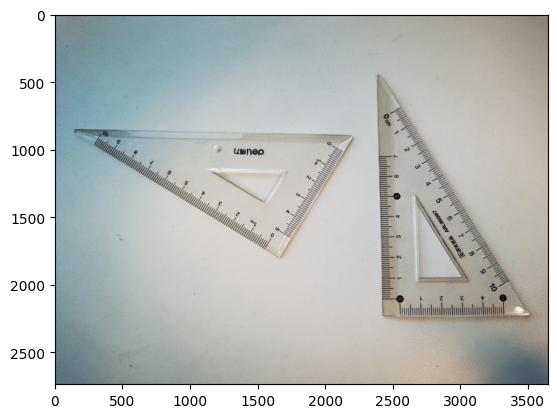

In [ ]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 载入labelme格式的json标注文件

In [ ]:
labelme_path = '1_labelme.json' # 选中由Labelme标注生成的json文件

In [ ]:
# utf-8是Unicode编码的不等长编码形式，网页上绝大多数均采用了Unicode进行编码

with open(labelme_path, 'r', encoding='utf-8') as f:
    labelme = json.load(f)

## 查看标注信息

In [ ]:
labelme.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [ ]:
# 获取使用Labelme标注后得到的信息

labelme['shapes']

[{'label': 'sjb_rect',
  'points': [[132.82352941176498, 829.764705882353],
   [2209.294117647059, 1818.0000000000002]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}},
 {'label': 'sjb_rect',
  'points': [[2368.117647058824, 429.7647058823531],
   [3524.0, 2273.8823529411766]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}},
 {'label': 'angle_30',
  'points': [[153.4117647058826, 862.1176470588236]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'angle_30',
  'points': [[2391.6470588235297, 450.3529411764707]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'angle_60',
  'points': [[2194.588235294118, 897.4117647058824]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'angle_60',
  'points': [[3500.470588235294, 2218.0]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'angle_90',
  'points': [[1665.1764705882354, 1797.4117647058824]],
  'group_id': None

## 框标注

In [ ]:
# 框（rectangle）可视化配置
bbox_color = (255, 129, 0)              # 框的颜色
bbox_thickness = 5                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':6,         # 字体大小
    'font_thickness':14,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,       # Y 方向，文字偏移距离，向下为正；此时将在标注对象的上方
}

In [ ]:
for each_ann in labelme['shapes']: # 遍历每一个标注所获取的信息

    if each_ann['shape_type'] == 'rectangle': # 筛选出框标注

        # 框的label
        bbox_label = each_ann['label']
        # 框的两点坐标
        bbox_keypoints = each_ann['points']
        bbox_keypoint_A_xy = bbox_keypoints[0]
        bbox_keypoint_B_xy = bbox_keypoints[1]
        # 左上角坐标
        bbox_top_left_x = int(min(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
        bbox_top_left_y = int(min(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))
        # 右下角坐标
        bbox_bottom_right_x = int(max(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
        bbox_bottom_right_y = int(max(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))

        # 画矩形：画框
        img_bgr = cv2.rectangle(img_bgr, (bbox_top_left_x, bbox_top_left_y), (bbox_bottom_right_x, bbox_bottom_right_y), bbox_color, bbox_thickness)

        # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_top_left_x+bbox_labelstr['offset_x'], bbox_top_left_y+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])


## 可视化--框

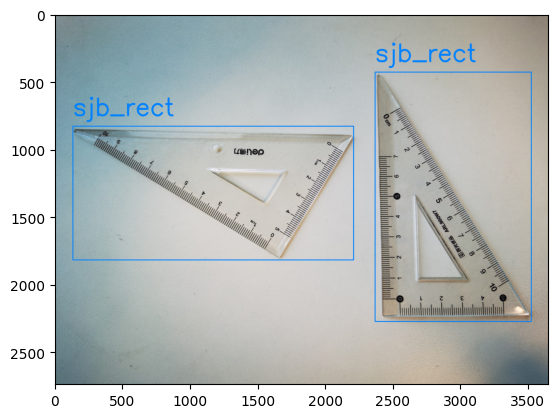

In [ ]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 关键点标注

In [ ]:
# 关键点的可视化配置


# 关键点配色,给三角板的三个角均进行标注
kpt_color_map = {
    'angle_30':{'id':0, 'color':[255,0,0], 'radius':30, 'thickness':-1},# radius 表示实心作圆的半径，‘thickness' = -1表示进行填充
    'angle_60':{'id':1, 'color':[0,255,0], 'radius':30, 'thickness':-1},
    'angle_90':{'id':2, 'color':[0,0,255], 'radius':30, 'thickness':-1}
}

# 点类别文字
kpt_labelstr = {
    'font_size':4,             # 字体大小
    'font_thickness':12,          # 字体粗细
    'offset_x':30,             # X 方向，文字偏移距离，向右为正
    'offset_y':100,            # Y 方向，文字偏移距离，向下为正
}

In [ ]:
for each_ann in labelme['shapes']: # 遍历每一个标注

    if each_ann['shape_type'] == 'point': # 筛选出关键点标注

        kpt_label = each_ann['label'] # 该点的类别

        # 该点的 XY 坐标
        kpt_xy = each_ann['points'][0]
        kpt_x, kpt_y = int(kpt_xy[0]), int(kpt_xy[1])

        # 该点的可视化配置
        kpt_color = kpt_color_map[kpt_label]['color']         # 颜色
        kpt_radius = kpt_color_map[kpt_label]['radius']       # 半径
        kpt_thickness = kpt_color_map[kpt_label]['thickness'] # 线宽（-1代表填充）

        # 画圆：画该关键点
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, kpt_thickness)

        # 写该点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])


## 可视化--关键点

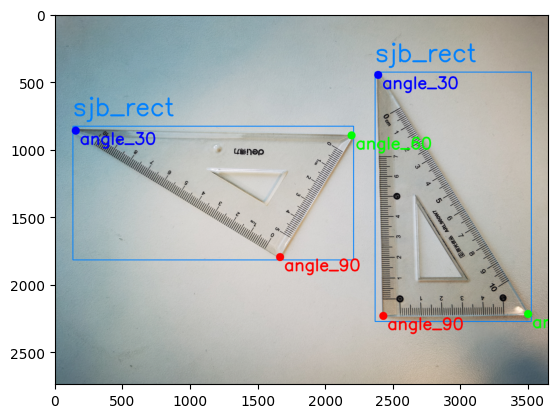

In [ ]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 可视化多段线（图像分割）标注

In [ ]:
# 多段线的可视化配置

poly_color = (151, 57, 224) # 可以任意调节RGB颜色
poly_thickness = 3

poly_labelstr = {
    'font_size':4,          # 字体大小
    'font_thickness':12,    # 字体粗细
    'offset_x':-200,        # X 方向，文字偏移距离，向右为正
    'offset_y':0,           # Y 方向，文字偏移距离，向下为正
}

In [ ]:
img_mask = np.ones(img_bgr.shape, np.uint8) # 使用np.uint8规定产生的单位矩阵为无符号的整形，否则无法正确获取多段线的填充效果

for each_ann in labelme['shapes']: # 遍历每一个标注

    if each_ann['shape_type'] == 'polygon': # 筛选出多段线（polygon）标注

        poly_label = each_ann['label'] # 该多段线的类别

        poly_points = [np.array(each_ann['points'], np.int32).reshape((-1, 1, 2))] # 该多段线每个点的坐标

        # 该多段线平均 XY 坐标，用于放置多段线类别文字
        x_mean = int(np.mean(poly_points[0][:,0,:][:,0]))
        y_mean = int(np.mean(poly_points[0][:,0,:][:,1]))

        # 画该多段线轮廓
        img_bgr = cv2.polylines(img_bgr, poly_points, isClosed=True, color=poly_color, thickness=poly_thickness)

        # 画该多段线内部填充
        img_mask = cv2.fillPoly(img_mask, poly_points, color=poly_color)

        # 写该多段线类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        img_bgr = cv2.putText(img_bgr, poly_label, (x_mean+poly_labelstr['offset_x'], y_mean+poly_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, poly_labelstr['font_size'], poly_color, poly_labelstr['font_thickness'])


## 可视化--多段线

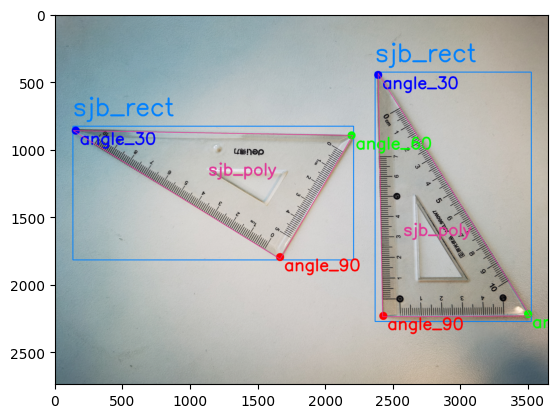

In [ ]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

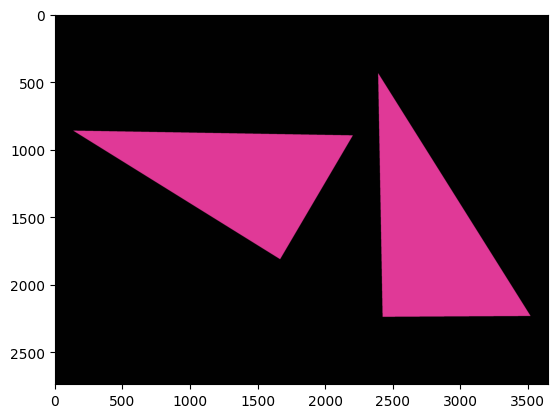

In [ ]:
# 多段线内部填充效果

plt.imshow(img_mask[:,:,::-1])
plt.show()

In [ ]:
opacity = 0.75 # 透明度，越大越接近原图
img_bgr = cv2.addWeighted(img_bgr, opacity, img_mask, 1-opacity, 0) # 将imag_mask覆盖在img_bgr上

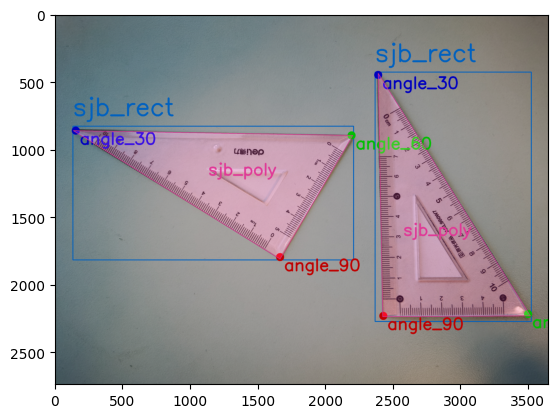

In [ ]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [ ]:
cv2.imwrite('result.jpg', img_bgr)

True

# 制作完整数据集

## 数据集的下载

In [ ]:
# 下载数据集至 datasets 目录
!rm -rf Triangle_215_Keypoint_Labelme.zip Triangle_215_Keypoint_Labelme
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/Triangle_215_Keypoint_Labelme.zip

--2023-08-10 07:57:51--  https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/Triangle_215_Keypoint_Labelme.zip
Resolving zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.162, 121.36.235.163
Connecting to zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-east-3.myhuaweicloud.com)|121.36.235.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191563644 (183M) [application/zip]
Saving to: ‘Triangle_215_Keypoint_Labelme.zip’

Triangle_215_Keypoi 100%[===================>] 182.69M  38.3MB/s    in 5.4s    

2023-08-10 07:57:57 (34.0 MB/s) - ‘Triangle_215_Keypoint_Labelme.zip’ saved [191563644/191563644]



In [ ]:
# 解压
!unzip Triangle_215_Keypoint_Labelme.zip >> /dev/null

# 删除压缩包
!rm -rf Triangle_215_Keypoint_Labelme.zip

In [ ]:
# 删除一些多余的文件

!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done

!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done

!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

## 创建表格整理一个标注的数据

In [ ]:
import os
import json

import numpy as np
import pandas as pd
import cv2

from tqdm import tqdm

In [ ]:
df = pd.DataFrame()

In [ ]:
# 读入一个图像的标注情况
labelme_path = '1_labelme.json'

with open(labelme_path, 'r', encoding='utf-8') as f:
    labelme = json.load(f)

In [ ]:
 # 获取图像元数据
imagePath = labelme['imagePath']
imageWidth = labelme['imageWidth']
imageHeight = labelme['imageHeight']

In [ ]:
for each_ann in tqdm(labelme['shapes']): # 遍历每一个标注

    df_temp = {}

    # 图像信息
    df_temp['imagePath'] = imagePath
    df_temp['imageWidth'] = imageWidth
    df_temp['imageHeight'] = imageHeight

    if each_ann['shape_type'] == 'rectangle': # 筛选出框标注

        # 框的两点坐标
        bbox_keypoints = each_ann['points']
        bbox_keypoint_A_xy = bbox_keypoints[0]
        bbox_keypoint_B_xy = bbox_keypoints[1]
        # 左上角坐标
        bbox_top_left_x = int(min(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
        bbox_top_left_y = int(min(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))
        # 右下角坐标
        bbox_bottom_right_x = int(max(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
        bbox_bottom_right_y = int(max(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))

        # 标注信息
        df_temp['label_type'] = each_ann['shape_type']
        df_temp['label'] = each_ann['label']

        # 框坐标信息
        df_temp['bbox_top_left_x'] = bbox_top_left_x
        df_temp['bbox_top_left_y'] = bbox_top_left_y
        df_temp['bbox_bottom_right_x'] = bbox_bottom_right_x
        df_temp['bbox_bottom_right_y'] = bbox_bottom_right_y
        df_temp['bbox_width_pix'] = bbox_bottom_right_x - bbox_top_left_x
        df_temp['bbox_height_pix'] = bbox_bottom_right_y - bbox_top_left_y
        df_temp['bbox_width_norm'] = df_temp['bbox_width_pix'] / df_temp['imageWidth']
        df_temp['bbox_height_norm'] = df_temp['bbox_height_pix'] / df_temp['imageHeight']
        df_temp['bbox_center_x_pix'] = (bbox_top_left_x + bbox_bottom_right_x) / 2
        df_temp['bbox_center_y_pix'] = (bbox_top_left_y + bbox_bottom_right_y) / 2
        df_temp['bbox_center_x_norm'] = (bbox_top_left_x + bbox_bottom_right_x) / 2 / df_temp['imageWidth']
        df_temp['bbox_center_y_norm'] = (bbox_top_left_y + bbox_bottom_right_y) / 2 / df_temp['imageHeight']

    if each_ann['shape_type'] == 'point': # 筛选出关键点标注

        # 该点的 XY 坐标
        kpt_xy = each_ann['points'][0]
        kpt_x, kpt_y = int(kpt_xy[0]), int(kpt_xy[1])

        # 标注信息
        df_temp['label_type'] = each_ann['shape_type']
        df_temp['label'] = each_ann['label']

        # 关键点坐标信息
        df_temp['kpt_x_pix'] = kpt_x
        df_temp['kpt_y_pix'] = kpt_y
        df_temp['kpt_x_norm'] = kpt_x / df_temp['imageWidth']
        df_temp['kpt_y_norm'] = kpt_y / df_temp['imageHeight']

    if each_ann['shape_type'] == 'polygon': # 筛选出多段线（polygon）标注

        poly_points = np.array(each_ann['points']).astype('uint32').tolist() # 该多段线每个点的坐标
        poly_num_points = len(poly_points) # 该多段线点的个数

        # 计算多段线区域面积
        poly_pts = [np.array(each_ann['points'], np.int32).reshape((-1, 1, 2))] # 该多段线每个点的坐标
        img_bgr = cv2.imread(imagePath)
        img_bgr = np.array(img_bgr)
        img_zeros = np.zeros(img_bgr.shape[:2], dtype='uint8')
        img_mask = cv2.fillPoly(img_zeros, poly_pts, 1)
        poly_area = np.sum(img_mask)

        # 标注信息
        df_temp['label_type'] = each_ann['shape_type']
        df_temp['label'] = each_ann['label']

        # 多段线信息
        df_temp['poly_points'] = poly_points
        df_temp['poly_num_points'] = poly_num_points
        df_temp['poly_area'] = poly_area


    df = df.append(df_temp, ignore_index=True)

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-28-3177d464b123>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
<ipython-input-28-3177d464b123>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
<ipython-input-28-3177d464b123>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
<ipython-input-28-3177d464b123>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
<ipython-input-28-3177d464b123>:80: FutureWarning: The frame.append method is deprecated and will be remov

In [ ]:
df

,imagePath,imageWidth,imageHeight,label_type,label,bbox_top_left_x,bbox_top_left_y,bbox_bottom_right_x,bbox_bottom_right_y,bbox_width_pix,...,bbox_center_y_pix,bbox_center_x_norm,bbox_center_y_norm,kpt_x_pix,kpt_y_pix,kpt_x_norm,kpt_y_norm,poly_points,poly_num_points,poly_area
0,1.jpg,3648,2736,rectangle,sjb_rect,132.0,829.0,2209.0,1818.0,2077.0,...,1323.5,0.320861,0.483735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.jpg,3648,2736,rectangle,sjb_rect,2368.0,429.0,3524.0,2273.0,1156.0,...,1351.0,0.807566,0.493787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.jpg,3648,2736,point,angle_30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,153.0,862.0,0.041941,0.315058,NaN,NaN,NaN
3,1.jpg,3648,2736,point,angle_30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2391.0,450.0,0.655428,0.164474,NaN,NaN,NaN
4,1.jpg,3648,2736,point,angle_60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2194.0,897.0,0.601425,0.327851,NaN,NaN,NaN
5,1.jpg,3648,2736,point,angle_60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3500.0,2218.0,0.959430,0.810673,NaN,NaN,NaN
6,1.jpg,3648,2736,point,angle_90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1665.0,1797.0,0.456414,0.656798,NaN,NaN,NaN
7,1.jpg,3648,2736,point,angle_90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2429.0,2232.0,0.665844,0.815789,NaN,NaN,NaN
8,1.jpg,3648,2736,polygon,sjb_poly,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[135, 862], [2203, 897], [1665, 1812]]",3.0,957783.0
9,1.jpg,3648,2736,polygon,sjb_poly,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[2391, 438], [2424, 2238], [3518, 2232]]",3.0,987034.0


## 创建表格整理所有标注的数据

In [ ]:
# 进入labelme标注文件目录

Dataset_root = 'Triangle_215_Keypoint_Labelme'

In [ ]:
os.chdir(os.path.join(Dataset_root, 'labelme_jsons'))

In [ ]:
print('共有 {} 个 labelme 格式的 json 标注文件'.format(len(os.listdir())))

共有 215 个 labelme 格式的 json 标注文件


In [ ]:
os.listdir()

['DSC_0382.json',
 'DSC_0360.json',
 'IMG_20230417_172124.json',
 'DSC_0366.json',
 'DSC_0370.json',
 'DSC_0409.json',
 'DSC_0378.json',
 'MVIMG_20230331_080914.json',
 'IMG_20230417_173410.json',
 'MVIMG_20230331_080948.json',
 'IMG_20230417_172209.json',
 'IMG_20230417_171906.json',
 'IMG_20230417_173359.json',
 'MVIMG_20230331_082443.json',
 'MVIMG_20230331_082301.json',
 'IMG_20230417_153602.json',
 'DSC_0373.json',
 'IMG_20230417_173420.json',
 'IMG_20230417_172814.json',
 'MVIMG_20230331_082339.json',
 'DSC_0219.json',
 'IMG_20230417_171704.json',
 'IMG_20230330_201947.json',
 'MVIMG_20230331_082330.json',
 'IMG_20230417_172857.json',
 'IMG_20230417_171841.json',
 'MVIMG_20230331_080908.json',
 'DSC_0318.json',
 'DSC_0405.json',
 'IMG_20230417_172510.json',
 'DSC_0341.json',
 'IMG_20230417_171802.json',
 'IMG_20230417_173721.json',
 'DSC_0358.json',
 'IMG_20230417_173635.json',
 'DSC_0348.json',
 'IMG_20230417_172218.json',
 'DSC_0274.json',
 'IMG_20230417_171654.json',
 'DSC_041

In [ ]:
# 将处理单个labelme标注文件的方式整理为函数

def process_sinlge_labelme(labelme_path):

    global df_result

    # 读入labelme格式的json文件
    with open(labelme_path, 'r', encoding='utf-8') as f:
        labelme = json.load(f)

    # 获取图像元数据
    imagePath = labelme['imagePath']
    imageWidth = labelme['imageWidth']
    imageHeight = labelme['imageHeight']

    for each_ann in labelme['shapes']: # 遍历每一个标注

        df_temp = {}

        # 图像信息
        df_temp['imagePath'] = imagePath
        df_temp['imageWidth'] = imageWidth
        df_temp['imageHeight'] = imageHeight

        if each_ann['shape_type'] == 'rectangle': # 筛选出框标注

            # 框的两点坐标
            bbox_keypoints = each_ann['points']
            bbox_keypoint_A_xy = bbox_keypoints[0]
            bbox_keypoint_B_xy = bbox_keypoints[1]
            # 左上角坐标
            bbox_top_left_x = int(min(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
            bbox_top_left_y = int(min(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))
            # 右下角坐标
            bbox_bottom_right_x = int(max(bbox_keypoint_A_xy[0], bbox_keypoint_B_xy[0]))
            bbox_bottom_right_y = int(max(bbox_keypoint_A_xy[1], bbox_keypoint_B_xy[1]))

            # 标注信息
            df_temp['label_type'] = each_ann['shape_type']
            df_temp['label'] = each_ann['label']

            # 框坐标信息
            df_temp['bbox_top_left_x'] = bbox_top_left_x
            df_temp['bbox_top_left_y'] = bbox_top_left_y
            df_temp['bbox_bottom_right_x'] = bbox_bottom_right_x
            df_temp['bbox_bottom_right_y'] = bbox_bottom_right_y
            df_temp['bbox_width_pix'] = bbox_bottom_right_x - bbox_top_left_x
            df_temp['bbox_height_pix'] = bbox_bottom_right_y - bbox_top_left_y
            df_temp['bbox_width_norm'] = df_temp['bbox_width_pix'] / df_temp['imageWidth']
            df_temp['bbox_height_norm'] = df_temp['bbox_height_pix'] / df_temp['imageHeight']
            df_temp['bbox_center_x_norm'] = (bbox_top_left_x + bbox_bottom_right_x) / 2 / df_temp['imageWidth']
            df_temp['bbox_center_y_norm'] = (bbox_top_left_y + bbox_bottom_right_y) / 2 / df_temp['imageHeight']

        if each_ann['shape_type'] == 'point': # 筛选出关键点标注

            # 该点的 XY 坐标
            kpt_xy = each_ann['points'][0]
            kpt_x, kpt_y = int(kpt_xy[0]), int(kpt_xy[1])

            # 标注信息
            df_temp['label_type'] = each_ann['shape_type']
            df_temp['label'] = each_ann['label']

            # 关键点坐标信息
            df_temp['kpt_x_pix'] = kpt_x
            df_temp['kpt_y_pix'] = kpt_y
            df_temp['kpt_x_norm'] = kpt_x / df_temp['imageWidth']
            df_temp['kpt_y_norm'] = kpt_y / df_temp['imageHeight']

        if each_ann['shape_type'] == 'polygon': # 筛选出多段线（polygon）标注

            poly_points = np.array(each_ann['points']).astype('uint32').tolist() # 该多段线每个点的坐标
            poly_num_points = len(poly_points) # 该多段线点的个数

            # 计算多段线区域面积
            poly_pts = [np.array(each_ann['points'], np.int32).reshape((-1, 1, 2))] # 该多段线每个点的坐标
            img_bgr = cv2.imread('../images/' + imagePath)
            img_bgr = np.array(img_bgr)
            img_zeros = np.zeros(img_bgr.shape[:2], dtype='uint8')
            img_mask = cv2.fillPoly(img_zeros, poly_pts, 1)
            poly_area = np.sum(img_mask)

            # 标注信息
            df_temp['label_type'] = each_ann['shape_type']
            df_temp['label'] = each_ann['label']

            # 多段线信息
            df_temp['poly_points'] = poly_points
            df_temp['poly_num_points'] = poly_num_points
            df_temp['poly_area'] = poly_area


        df_result = df_result.append(df_temp, ignore_index=True)

In [ ]:
df_result = pd.DataFrame()

In [ ]:
for labelme_path in tqdm(os.listdir()):
    process_sinlge_labelme(labelme_path)

  0%|          | 0/215 [00:00<?, ?it/s]<ipython-input-34-d3424574605a>:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp, ignore_index=True)
<ipython-input-34-d3424574605a>:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp, ignore_index=True)
<ipython-input-34-d3424574605a>:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp, ignore_index=True)
<ipython-input-34-d3424574605a>:93: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp, ignore_index=True)
<ipython-input-34-d3424574605a>:93: FutureWarning

In [ ]:
df_result

,imagePath,imageWidth,imageHeight,label_type,label,bbox_top_left_x,bbox_top_left_y,bbox_bottom_right_x,bbox_bottom_right_y,bbox_width_pix,...,bbox_height_norm,bbox_center_x_norm,bbox_center_y_norm,kpt_x_pix,kpt_y_pix,kpt_x_norm,kpt_y_norm,poly_points,poly_num_points,poly_area
0,DSC_0382.jpg,5568,3712,rectangle,sjb_rect,522.0,14.0,2618.0,1222.0,2096.0,...,0.325431,0.281968,0.166487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DSC_0382.jpg,5568,3712,rectangle,sjb_rect,2786.0,990.0,4886.0,2194.0,2100.0,...,0.324353,0.688937,0.428879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSC_0382.jpg,5568,3712,rectangle,sjb_rect,1526.0,1254.0,2746.0,3346.0,1220.0,...,0.563578,0.383621,0.619612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DSC_0382.jpg,5568,3712,point,angle_30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2596.0,1160.0,0.466236,0.312500,NaN,NaN,NaN
4,DSC_0382.jpg,5568,3712,point,angle_30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2834.0,1132.0,0.508980,0.304957,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,DSC_0406.jpg,5568,3712,point,angle_90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3370.0,2640.0,0.605244,0.711207,NaN,NaN,NaN
1662,IMG_20230417_153357.jpg,3648,2736,rectangle,sjb_rect,2415.0,420.0,3453.0,2353.0,1038.0,...,0.706506,0.804276,0.506762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1663,IMG_20230417_153357.jpg,3648,2736,point,angle_30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2747.0,435.0,0.753015,0.158991,NaN,NaN,NaN
1664,IMG_20230417_153357.jpg,3648,2736,point,angle_60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3429.0,2309.0,0.939967,0.843933,NaN,NaN,NaN


In [ ]:
df_result.shape

In [ ]:
# 将Dataframe文件保存下来

df_result.to_csv('k_p_detection_dataset.csv', index=False)

# 数据集挖掘探索可视化

## 库

In [ ]:
import os

import cv2
import numpy as np
import pandas as pd
import math

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
%matplotlib inline

## 设置Matplotlib中文字体

In [ ]:
# 从 Google API 上下载暂存字体放到暂存文件夹下

!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

--2023-08-10 07:58:21--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.250.4.128, 172.253.118.128, 74.125.200.128, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  22.2MB/s    in 6.6s    

2023-08-10 07:58:28 (17.5 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  


In [ ]:
# 指定字体
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

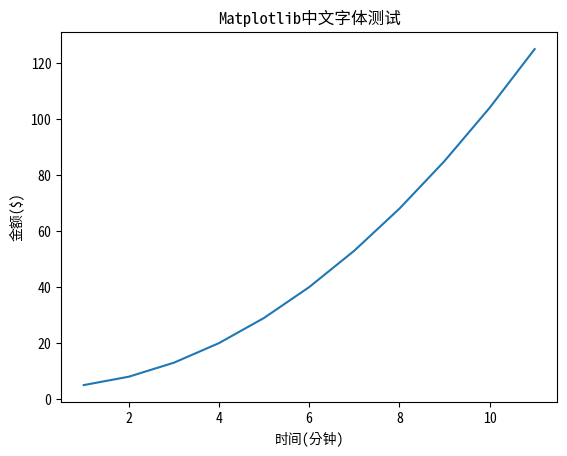

In [ ]:
#测试
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

x = np.arange(1, 12)
y = x ** 2 + 4
plt.title("Matplotlib中文字体测试")
plt.xlabel("时间(分钟)")
plt.ylabel("金额($)")
plt.plot(x,y)
plt.show()

## 数据集展示

In [ ]:
folder_path = '/content/Triangle_215_Keypoint_Labelme/images'

N = 16 # 可视化图像的个数

<ipython-input-46-ca9f28c1c8eb>:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


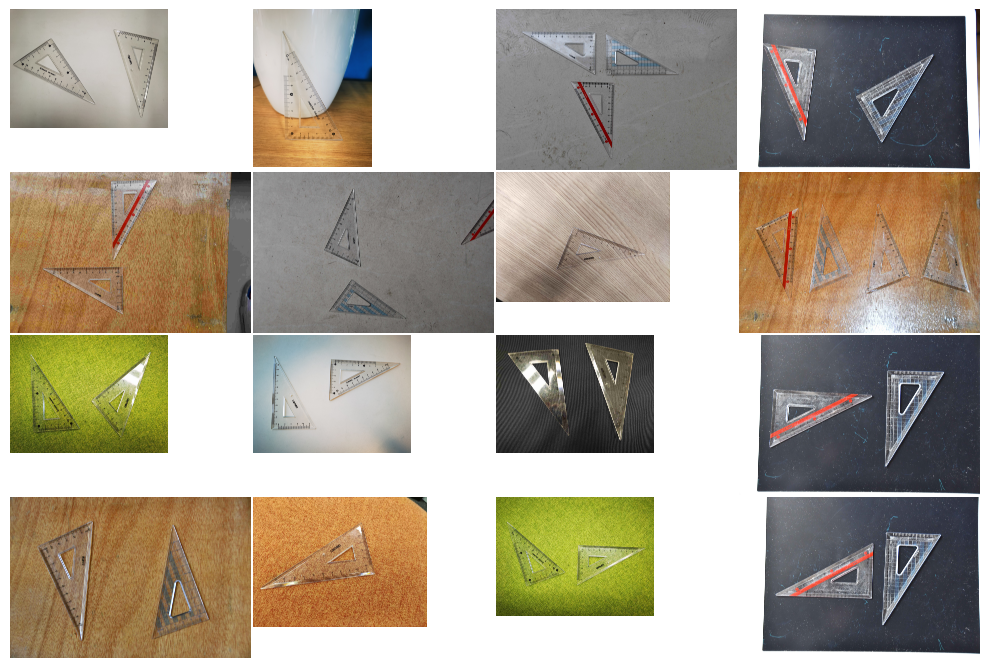

In [ ]:
# n 行 n 列
n = math.floor(np.sqrt(N))

# 读取文件夹中的所有图像
images = []
for each_img in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

# 画图
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(       fig, 111,  # 类似绘制子图 subplot(111),规定每一个图片的尺寸
                 nrows_ncols=(n, n),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                 )

# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()

plt.savefig('图表/图像-一些图像.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 图像尺寸分布

In [ ]:
df = pd.read_csv('/content/k_p_detection_dataset.csv')

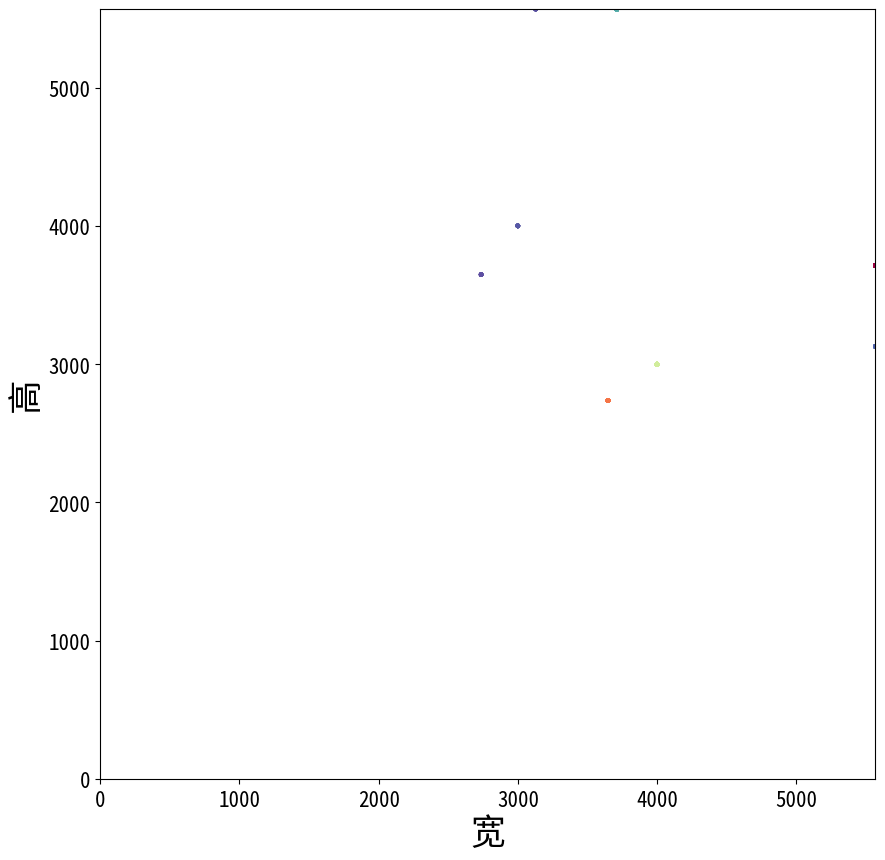

In [ ]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['imageWidth']
y = df['imageHeight']


# -------------------------分类可视化------------------------------------------
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy) # 根据不同尺寸图片出现次数匹配点的颜色

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# -----------------------------------------------------------------------------


plt.figure(figsize=(10,10))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')

# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['imageWidth']), max(df['imageHeight']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('高', fontsize=25)
plt.xlabel('宽', fontsize=25)

plt.savefig('图表/图像-图像宽高尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 标注种类分布

In [ ]:
df_num = pd.DataFrame()
label_type_list = []
num_list = []
for each in df['label_type'].unique(): # 对每一张图片的标注类别进行遍历
    label_type_list.append(each)
    num_list.append(len(df[df['label_type']==each]))

df_num['label_type'] = label_type_list
df_num['num'] = num_list

# 排序
df_num = df_num.sort_values(by='num', ascending=False)

In [ ]:
df_num

,label_type,num
1,point,1232
0,rectangle,413
2,polygon,21


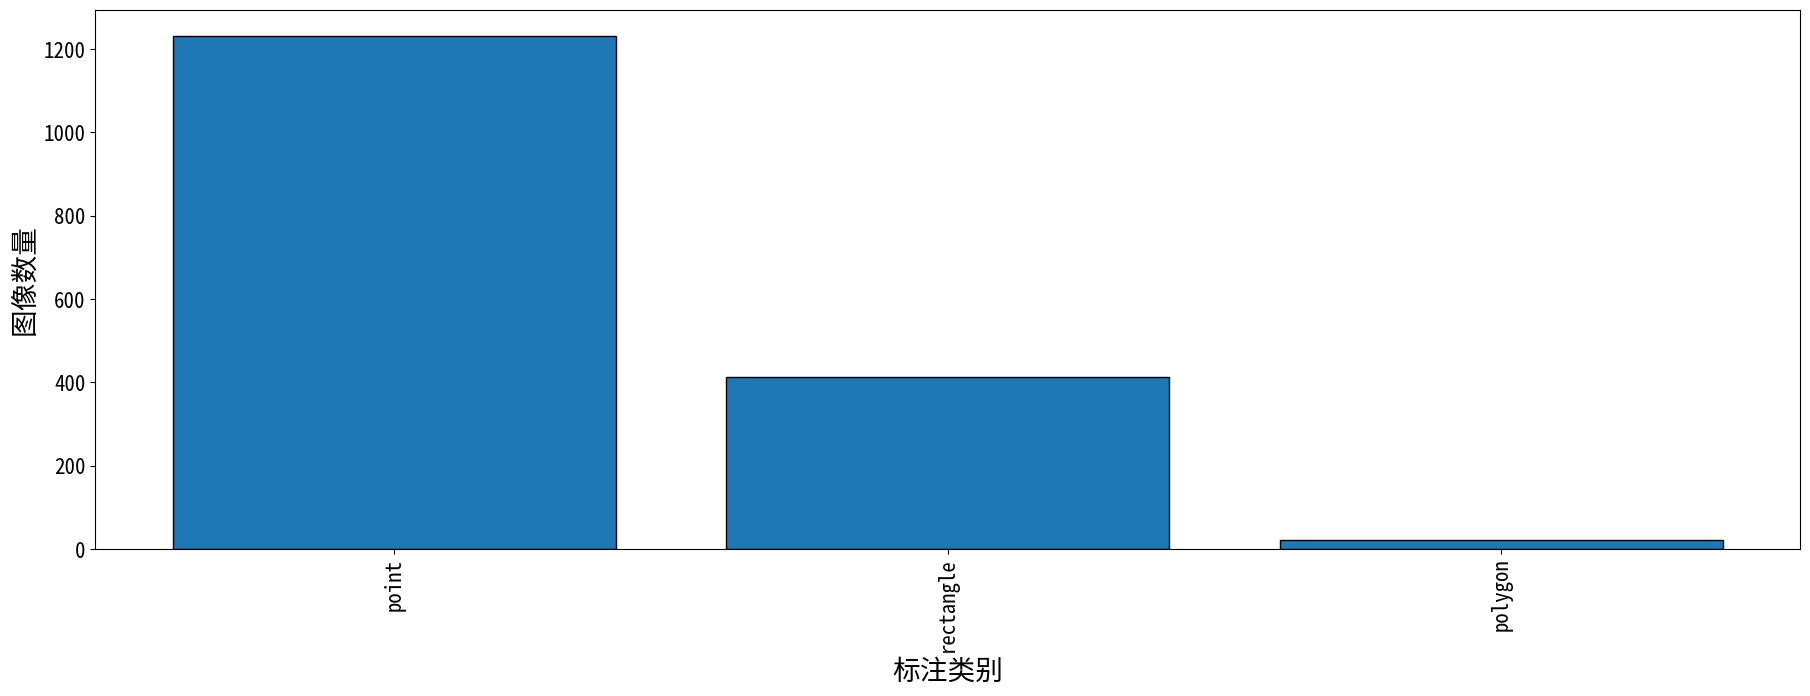

In [ ]:
plt.figure(figsize=(22, 7))

x = df_num['label_type']
y = df_num['num']

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('标注类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

plt.savefig('图表/图像-各标注种类个数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 图像标注类别数量分布

In [ ]:
df_num = pd.DataFrame()
label_type_list = []
num_list = []
for each in df['imagePath'].unique(): # 对每一张图片特有的图像路径进行遍历
    label_type_list.append(each)
    num_list.append(len(df[df['imagePath']==each]))

df_num['label_type'] = label_type_list
df_num['num'] = num_list

df_num = df_num.sort_values(by='num', ascending=False)

In [ ]:
df_num

,label_type,num
89,DSC_0280.jpg,16
152,DSC_0373.jpg,15
56,DSC_0370.jpg,15
110,DSC_0372.jpg,15
97,DSC_0371.jpg,15
...,...,...
90,MVIMG_20230331_082447.jpg,4
179,MVIMG_20230331_082419.jpg,4
119,DSC_0240.jpg,4
159,MVIMG_20230331_082301.jpg,4


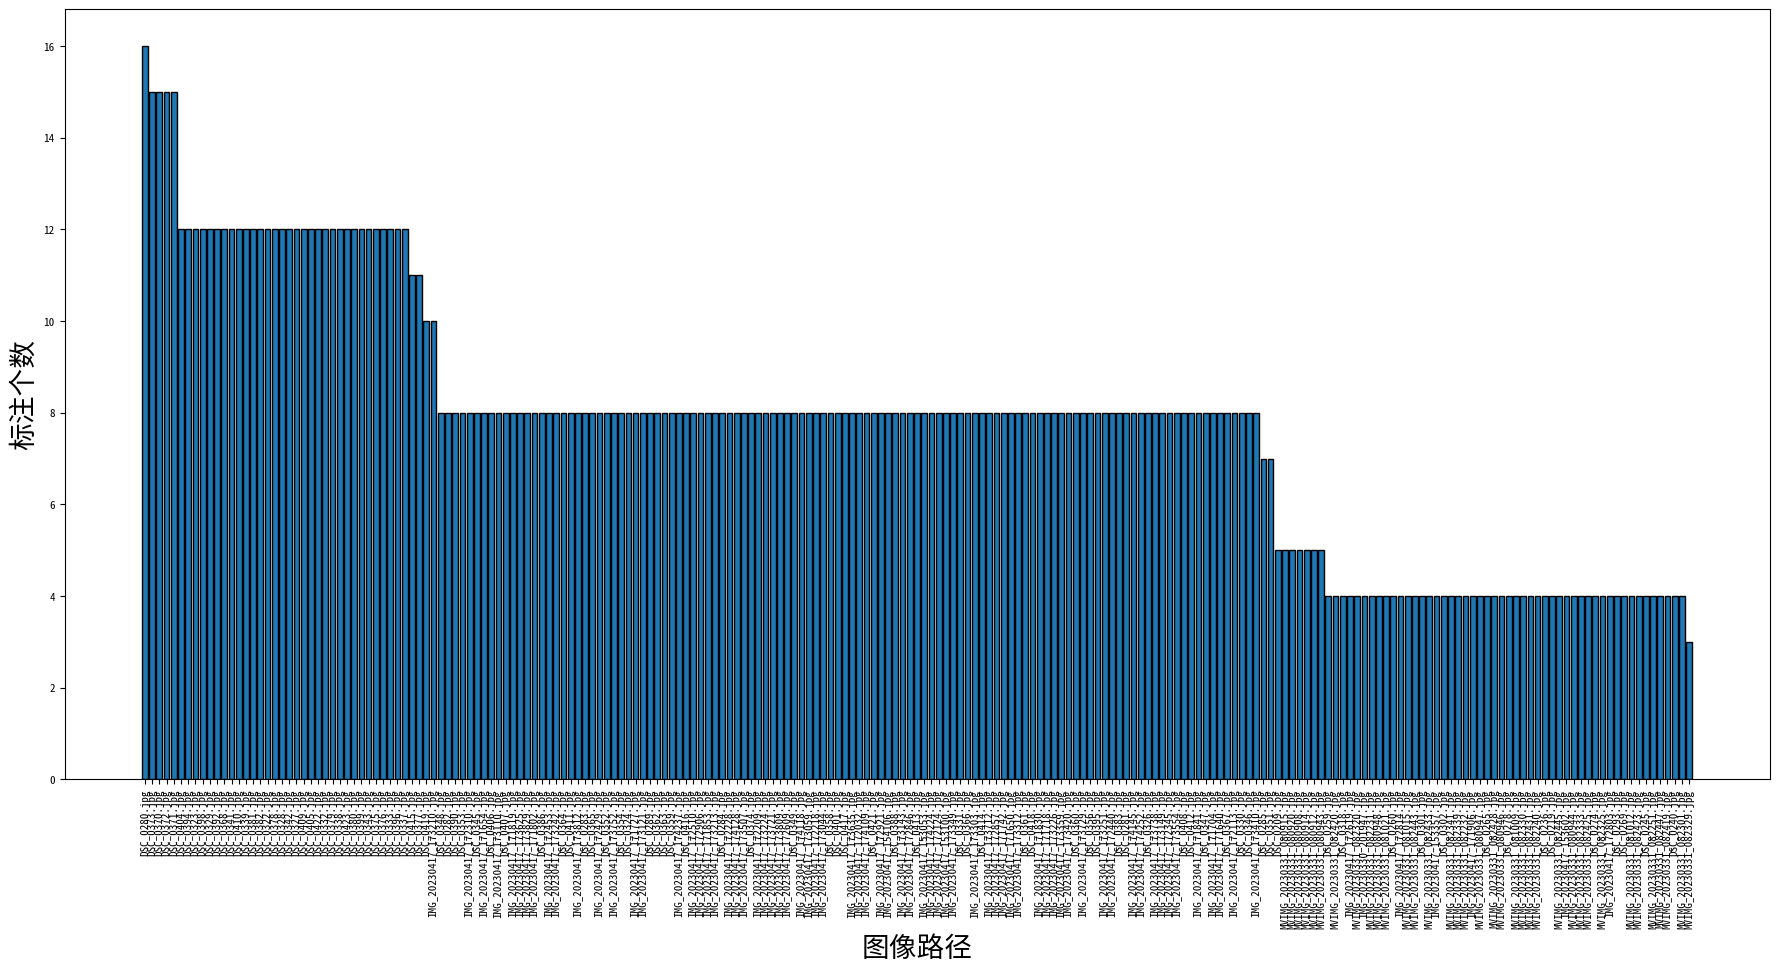

In [ ]:
plt.figure(figsize=(22, 10))

x = df_num['label_type']
y = df_num['num']

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.xlabel('图像路径', fontsize=20)
plt.ylabel('标注个数', fontsize=20)

plt.savefig('图表/图像-不同图像的标注个数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 关键点（30°，60°，90°）位置分布

In [ ]:
# 二选一运行
df_point = df_result[df_result['label_type']=='point']    # 所有关键点
# df_point = df[df['label']=='angle_30']      # 指定一类关键点

In [ ]:
# 如果使用reset_index（）方法，则可以将索引（行名称，行标签）重新分配为从0开始的序列号（行号），其中参数drop表示删除原始索引

df_point = df_point.reset_index(drop=True)

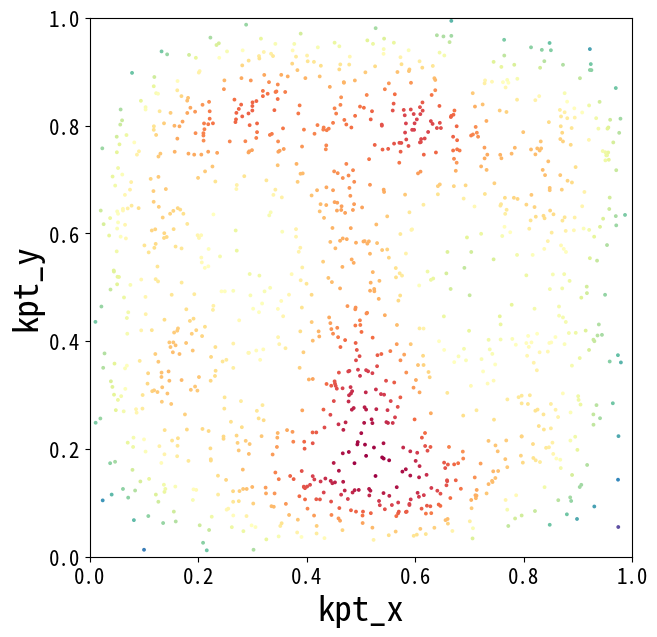

In [ ]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

# 所有关键点，以此观察位置分布
x = df_point['kpt_x_norm']
y = df_point['kpt_y_norm']


#-------------------------------------------------------------------------------
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
#-------------------------------------------------------------------------------


plt.figure(figsize=(7,7))
plt.scatter(x, y,c=z,  s=3,cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])
plt.tick_params(labelsize=15)
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('kpt_x', fontsize=25)
plt.ylabel('kpt_y', fontsize=25)

plt.savefig('图表/关键点标注-关键点位置分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 多段线所围面积分布

In [ ]:
# 该部分重点关注多段线

df_poly = df[df['label_type']=='polygon']
df_poly = df_poly.reset_index(drop=True)

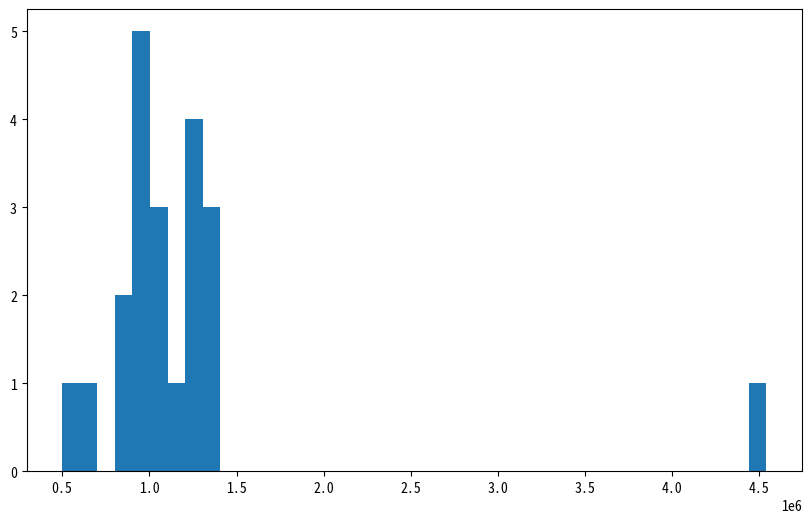

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_poly['poly_area'], bins=40) # 绘制直方图
plt.savefig('图表/多段线标注-多段线区域面积直方图.pdf', dpi=120, bbox_inches='tight') # 其中bbox_inches='tight'表示裁剪图片周围的留白部分
plt.show()